## Making all the files into one big dict of dataframes:

In [9]:
import os
import pandas as pd
import pprint 
import pickle
import numpy as np
pp = pprint.PrettyPrinter(indent=4)

In [10]:
def read_csv_files_in_directory(directory):
    """
    This function takes a directory path as an input and returns a dictionary of Pandas DataFrames 
    of all the CSV files found recursively in the directory, merged by the 'frame' column.
    """
    dataframes = {}
    for root, directories, files in os.walk(directory):
        #print(len(files))
        for file in files:
            if file.endswith('keypoints.csv'):
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path)
                #print(file)
                # Check if 'frame' column exists in dataframe
                if 'frame' in df.columns:
                    # Get the common 'frame' column
                    common_col = df['frame'][0]
                    #print(common_col)
                    # Check if there is another csv file with same 'frame' column
                    other_csv_file = [f for f in files if f.endswith('.csv') and f != file and 'frame' in pd.read_csv(os.path.join(root, f)).columns]
                    if other_csv_file:
                        other_csv_file_path = os.path.join(root, other_csv_file[0])
                        other_df = pd.read_csv(other_csv_file_path)
                        # Merge the two dataframes by 'frame' column
                        merged_df = pd.merge(df, other_df, on='frame')
                        # Store merged dataframe in dictionary with filename as keys
                        dataframes[root] = merged_df
            continue
    return dataframes

In [11]:
directory_path = "/home/roni/coding/mastersProject/src/csvOut"
dataframes = read_csv_files_in_directory(directory_path)

In [12]:
print(dataframes['/home/roni/coding/mastersProject/src/csvOut/p_59/recording_0'].columns)


Index(['Unnamed: 0', 'participant', 'frame', 'pose', 'hand_left', 'hand_right',
       'leftHandTouching', 'rightHandTouching', ' face_id', ' timestamp',
       ' confidence', ' success', ' AU01_r', ' AU02_r', ' AU04_r', ' AU05_r',
       ' AU06_r', ' AU07_r', ' AU09_r', ' AU10_r', ' AU12_r', ' AU14_r',
       ' AU15_r', ' AU17_r', ' AU20_r', ' AU23_r', ' AU25_r', ' AU26_r',
       ' AU45_r', ' AU01_c', ' AU02_c', ' AU04_c', ' AU05_c', ' AU06_c',
       ' AU07_c', ' AU09_c', ' AU10_c', ' AU12_c', ' AU14_c', ' AU15_c',
       ' AU17_c', ' AU20_c', ' AU23_c', ' AU25_c', ' AU26_c', ' AU28_c',
       ' AU45_c'],
      dtype='object')


## Creating some basic statistics:

In [13]:
columns = dataframes['/home/roni/coding/mastersProject/src/csvOut/p_59/recording_0'].columns
totaldfs = len(dataframes)


basicstats = { 'leftHandTouching':0, 'rightHandTouching':0 }

for i in columns[12:]:
    basicstats[i] = 0
    

print(totaldfs)
#pp.pprint(basicstats)

65


In [14]:
for df in dataframes:
    for i in basicstats:
        #print(dataframes[df][i].sum(axis=0))
        #print(pd.mean(dataframes[df][i]))
        basicstats[i] += dataframes[df][i].mean(axis=0)
        
for i in basicstats:
    basicstats[i] /= totaldfs

pp.pprint(basicstats)

{   ' AU01_c': 0.23924162849342978,
    ' AU01_r': 0.2979937364553169,
    ' AU02_c': 0.34597104122912253,
    ' AU02_r': 0.15812073031424595,
    ' AU04_c': 0.3503746661100466,
    ' AU04_r': 0.7889815652894323,
    ' AU05_c': 0.33791780461807214,
    ' AU05_r': 0.07985762056128358,
    ' AU06_c': 0.19638965946802328,
    ' AU06_r': 0.14072196544680926,
    ' AU07_c': 0.2117203845273079,
    ' AU07_r': 0.6115581970139713,
    ' AU09_c': 0.04491051042124723,
    ' AU09_r': 0.13012758648179096,
    ' AU10_c': 0.277061499048994,
    ' AU10_r': 0.39597720303980266,
    ' AU12_c': 0.18250083443675275,
    ' AU12_r': 0.27009949864718996,
    ' AU14_c': 0.22819913250642998,
    ' AU14_r': 0.2597231879830788,
    ' AU15_c': 0.25932177721326927,
    ' AU15_r': 0.6153611987052656,
    ' AU17_c': 0.35257990225840835,
    ' AU17_r': 1.157556568049701,
    ' AU20_c': 0.2868379535512866,
    ' AU20_r': 0.42498832758431854,
    ' AU23_c': 0.20969055375484869,
    ' AU23_r': 0.21212986160789218,
    

/tmp/ipykernel_11342/871709006.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=35, ha='right')


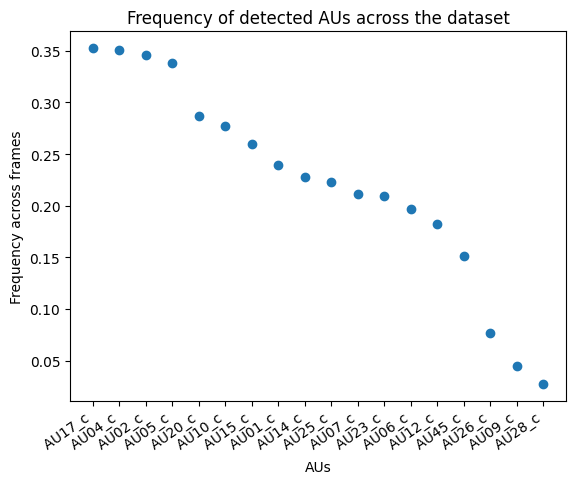

In [15]:
# todo: make two graphs showing the avg frequency and avg intensity of the AUs.
# i think i need to make two comparisons, one with all the data and then a separate one that just has the facetouching ones. FoR sTaTistiCaL sIgnIfiCAnce.
import matplotlib.pyplot as plt
import numpy as np


intensity = {k:v for k,v in basicstats.items() if k.endswith('_r')}
frequency = {k:v for k,v in basicstats.items() if k.endswith('_c')}

freq_s = dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True))


# Convert the dictionary to two NumPy arrays
x = np.array(list(freq_s.keys()))
y = np.array(list(freq_s.values()))

# Create a Matplotlib figure and subplot
fig, ax = plt.subplots()

# Plot the data on the subplot
ax.scatter(x, y)

# Customize the plot as desired
ax.set_xlabel('AUs')
ax.set_ylabel('Frequency across frames')
ax.set_title('Frequency of detected AUs across the dataset')
ax.set_xticklabels(x, rotation=35, ha='right')
# Show the plot
plt.savefig('frequencyacrossdataset.png')
plt.show()

/tmp/ipykernel_11342/3850929192.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=35, ha='right')


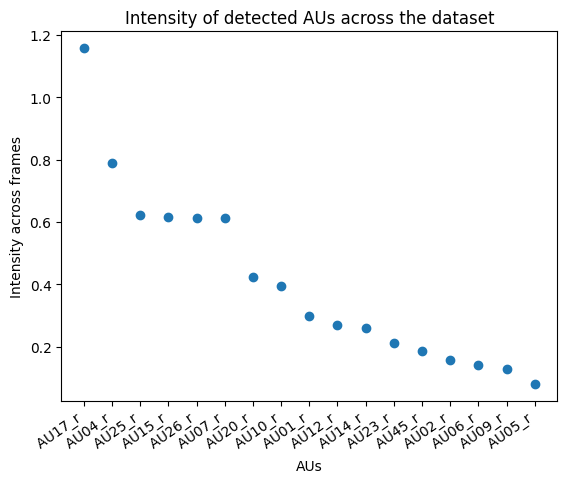

In [16]:

inten_s = dict(sorted(intensity.items(), key=lambda item: item[1], reverse=True))


# Convert the dictionary to two NumPy arrays
x = np.array(list(inten_s.keys()))
y = np.array(list(inten_s.values()))

# Create a Matplotlib figure and subplot
fig, ax = plt.subplots()

# Plot the data on the subplot
ax.scatter(x, y)

# Customize the plot as desired
ax.set_xlabel('AUs')
ax.set_ylabel('Intensity across frames')
ax.set_title('Intensity of detected AUs across the dataset')
ax.set_xticklabels(x, rotation=35, ha='right')
# Show the plot
plt.savefig('intensityacrossdataset.png')
plt.show()

_r -> intensity from 0 to 5

_c -> presence

Now we have the average intensity of AUs across all participants and frequency of left/right hand touches.

# Removing non-facetouch dfs and recalculating stats

In [17]:
ft_dataframes = {}
count = 0
for df in dataframes:
    temp = dataframes[df]
    r = True in temp['rightHandTouching'].values
    l = True in temp['leftHandTouching'].values
    #print(r, l)
    
    if( r==False and l==False):
        print(df, " doesn't have any facetouch")
        count += 1
    elif ( r==True or l==True ):
        #print("we found facetouch")
        ft_dataframes[df] = temp
    

/home/roni/coding/mastersProject/src/csvOut/p_59/recording_3  doesn't have any facetouch
/home/roni/coding/mastersProject/src/csvOut/p_59/recording_4  doesn't have any facetouch
/home/roni/coding/mastersProject/src/csvOut/p_59/recording_1  doesn't have any facetouch
/home/roni/coding/mastersProject/src/csvOut/p_39/recording_0  doesn't have any facetouch
/home/roni/coding/mastersProject/src/csvOut/p_94  doesn't have any facetouch
/home/roni/coding/mastersProject/src/csvOut/p_56/recording_0  doesn't have any facetouch
/home/roni/coding/mastersProject/src/csvOut/p_13  doesn't have any facetouch
/home/roni/coding/mastersProject/src/csvOut/p_74/recording_1  doesn't have any facetouch
/home/roni/coding/mastersProject/src/csvOut/p_105/recording_1  doesn't have any facetouch
/home/roni/coding/mastersProject/src/csvOut/p_73/recording_2  doesn't have any facetouch
/home/roni/coding/mastersProject/src/csvOut/p_73/recording_1  doesn't have any facetouch
/home/roni/coding/mastersProject/src/csvOut/

In [18]:
print("number of videos with facetouch: ", len(ft_dataframes))
print("number of videos without facetouch: ", count)
print("number of total videos: ", len(dataframes))
print("percentage of FT videos in total dataset:", round(len(ft_dataframes)/len(dataframes)*100,2),"%")

number of videos with facetouch:  50
number of videos without facetouch:  15
number of total videos:  65
percentage of FT videos in total dataset: 76.92 %


In [19]:
# now we recalculate our basic statistics on the new dict

ft_totaldfs = len(ft_dataframes)


ft_basicstats = { 'leftHandTouching':0, 'rightHandTouching':0 }

for i in columns[12:]:
    ft_basicstats[i] = 0
    

print(ft_totaldfs)
#pp.pprint(basicstats)
frames = 0

for df in ft_dataframes:
    for i in ft_basicstats:
        #print(dataframes[df][i].sum(axis=0))
        #print(pd.mean(dataframes[df][i]))
        ft_basicstats[i] += ft_dataframes[df][i].mean(axis=0)
    frames += len(ft_dataframes[df])
frames /= len(ft_dataframes)
for i in ft_basicstats:
    ft_basicstats[i] /= ft_totaldfs

pp.pprint(ft_basicstats)
print("average frames per video:",frames)

50
{   ' AU01_c': 0.25366124644837357,
    ' AU01_r': 0.33165557105131943,
    ' AU02_c': 0.36979308018329204,
    ' AU02_r': 0.17390411030665917,
    ' AU04_c': 0.35616530284652953,
    ' AU04_r': 0.7891767063992111,
    ' AU05_c': 0.35294602566638866,
    ' AU05_r': 0.08397812271405551,
    ' AU06_c': 0.19192965567846604,
    ' AU06_r': 0.13253019323454002,
    ' AU07_c': 0.21084138899271992,
    ' AU07_r': 0.6046965952488664,
    ' AU09_c': 0.03812722094053769,
    ' AU09_r': 0.1386037489330309,
    ' AU10_c': 0.2908840685970698,
    ' AU10_r': 0.4176863922297128,
    ' AU12_c': 0.1764428165631888,
    ' AU12_r': 0.27144316628585924,
    ' AU14_c': 0.2299190848743241,
    ' AU14_r': 0.2729468961896431,
    ' AU15_c': 0.26720303351239183,
    ' AU15_r': 0.659850625139556,
    ' AU17_c': 0.37411904699490955,
    ' AU17_r': 1.205266230627438,
    ' AU20_c': 0.2961433565120453,
    ' AU20_r': 0.46226445780145625,
    ' AU23_c': 0.21685432489770864,
    ' AU23_r': 0.23589426215821654,
  

/tmp/ipykernel_11342/1144488418.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=35, ha='right')


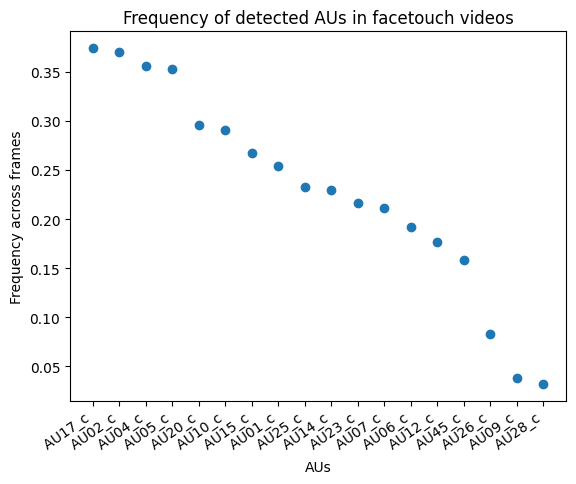

In [20]:


intensity = {k:v for k,v in ft_basicstats.items() if k.endswith('_r')}
frequency = {k:v for k,v in ft_basicstats.items() if k.endswith('_c')}

freq_s = dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True))


# Convert the dictionary to two NumPy arrays
x = np.array(list(freq_s.keys()))
y = np.array(list(freq_s.values()))

# Create a Matplotlib figure and subplot
fig, ax = plt.subplots()

# Plot the data on the subplot
ax.scatter(x, y)

# Customize the plot as desired
ax.set_xlabel('AUs')
ax.set_ylabel('Frequency across frames')
ax.set_title('Frequency of detected AUs in facetouch videos')
ax.set_xticklabels(x, rotation=35, ha='right')
# Show the plot
plt.savefig('frequencyacrossfacetouch.png')
plt.show()

/tmp/ipykernel_11342/679235618.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=35, ha='right')


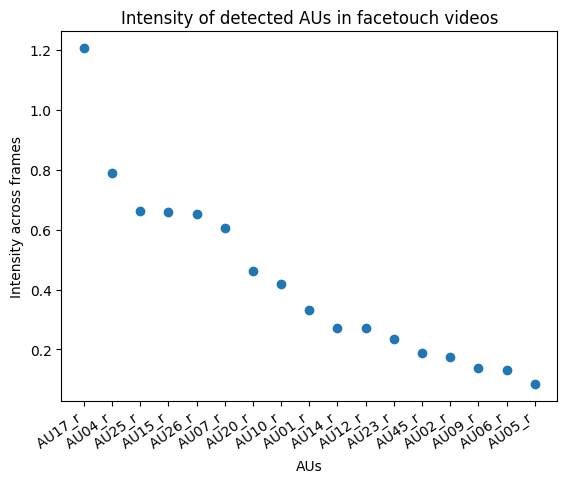

In [21]:

inten_s = dict(sorted(intensity.items(), key=lambda item: item[1], reverse=True))


# Convert the dictionary to two NumPy arrays
x = np.array(list(inten_s.keys()))
y = np.array(list(inten_s.values()))

# Create a Matplotlib figure and subplot
fig, ax = plt.subplots()

# Plot the data on the subplot
ax.scatter(x, y)

# Customize the plot as desired
ax.set_xlabel('AUs')
ax.set_ylabel('Intensity across frames')
ax.set_title('Intensity of detected AUs in facetouch videos')
ax.set_xticklabels(x, rotation=35, ha='right')
# Show the plot
plt.savefig('intensityacrossfacetouch.png')
plt.show()

# Correlation Analysis

In [22]:
truths = pd.read_csv("/home/roni/coding/mastersProject/src/featureExtraction/truths.csv")

truths.head
#relevant columns: 'Participant ID', 'GAD Score', 'PHQ Score'

<bound method NDFrame.head of     Unnamed: 0  Participant ID  GAD Score  PHQ Score
0           13              13          2          1
1            1              14          1          1
2           23              15          0          1
3            4              18          8         16
4            7              20          2          3
5           32              25          3          1
6            0              29         10         13
7            6              33         19         18
8            5              39          9         15
9           20              45         15         11
10          12              46         11          9
11          31              50         13          6
12          29              52          2          4
13          34              56          7          9
14           8              58          0          1
15          30              59         11         11
16          10              61         12          8
17          15  

In [23]:
gads= truths[['Participant ID', 'GAD Score']]
phqs = truths[['Participant ID', 'PHQ Score']] 

In order to find the average correlations, need to compute correlations for each file for each AU and for each GAD and PHQ and store them as a list.

EDIT: no use comparing AUs to scores. need to compare to gestures.

Use df.corr(truths) with correct columns.

Then to find the average across participants:
1. find fishers z values of the correlations
2. average those
3. find reverse fishers z transform on that avg value

that's the correlation!

In [24]:
left_corrs = {}
right_corrs = {}

In [25]:
print(columns[12:29])

Index([' AU01_r', ' AU02_r', ' AU04_r', ' AU05_r', ' AU06_r', ' AU07_r',
       ' AU09_r', ' AU10_r', ' AU12_r', ' AU14_r', ' AU15_r', ' AU17_r',
       ' AU20_r', ' AU23_r', ' AU25_r', ' AU26_r', ' AU45_r'],
      dtype='object')


In [26]:
for i in columns[12:29]:
    left_corrs[i] = []
    right_corrs[i] = []

In [27]:
print(type( gads['Participant ID'][0] ))

<class 'numpy.int64'>


In [28]:
def addScoreToDF(df): 
    scoreGAD = float(gads.loc[gads['Participant ID']==int(dataframes[df]['participant'][0][2:]) ]['GAD Score'] )
    scorePHQ = float(phqs.loc[phqs['Participant ID']==int(dataframes[df]['participant'][0][2:]) ]['PHQ Score'] )
    
    ft_dataframes[df]['GAD Score'] = scoreGAD
    ft_dataframes[df]['PHQ Score'] = scorePHQ
    
    

In [29]:
for df in ft_dataframes:
    addScoreToDF(df)

So now we have reduced out dataframes to the ones that contain facetouch and have also added the scores for good measure.
We have also saved the dataframe dict to a file to make things easier in the future. Now we can just load it.

In [30]:
#ex = ft_dataframes['/home/roni/coding/mastersProject/src/csvOut/p_15']
#print(ex[ ex['rightHandTouching']== True ])
#print(type(ex[' AU01_c'][0]))
#for i in gad_corrs:

#score = ex['GAD Score'][0]
#print(len(ex))
#print(ex[' AU15_c'].dropna().corr( pd.Series([score]*len(ex)), method='pearson', min_periods=1))
#ex.to_csv('example_dataframe.cvs')
#ex.info()

Result: correlation with score is pointless to compute because I am comparing it to constant a constant value. Yayyy.
 
# Moving onto correlation between hand over face gestures and AUs.

For this we need to somehow combine the list of coordinates and confidences that we have for left hand and right hand (separately) into a single number to compare it with the AUs. To do this, we will utilise the distance-weighted average between the coordinates and weight them by using the confidence scores.

In [31]:
def string_to_float_list(string):
    float_list = []
    string = string.strip('[]')  # remove brackets from the string
    string_list = string.split(', ')  # split the string into a list of strings
    for s in string_list:
        float_list.append(float(s))  # convert each string to a float and append to the float_list
    return float_list

In [32]:
import math

def combine_predictions(predictions_str):
    #input is a string initially, need to 
    predictions = string_to_float_list(predictions_str)
    if all(elem == 0.0 for elem in predictions):
        return 0
    
    # Normalize x and y values with mean values as (0,0)
    x_vals = predictions[::3]
    y_vals = predictions[1::3]
    mean_x = sum(x_vals) / len(x_vals)
    mean_y = sum(y_vals) / len(y_vals)
    max_val = [abs(mean_x), abs(mean_y)]
    for i in range(len(x_vals)):
        if(x_vals[i]==0 or y_vals[i]==0):
            continue
        x_vals[i] = (x_vals[i] - mean_x) / max_val[0]
        y_vals[i] = (y_vals[i] - mean_y) / max_val[1]
    normalized_predictions = [val for pair in zip(x_vals, y_vals, predictions[2::3]) for val in pair]
    
    sum_x = 0
    sum_y = 0
    sum_c = 0
    for i in range(0, len(normalized_predictions), 3):
        
        x = normalized_predictions[i]
        y = normalized_predictions[i+1]
        c = normalized_predictions[i+2]
        if(x==0.0 or y==0.0 or  c==0.0):
            continue
        
        sum_x += x * c
        sum_y += y * c
        sum_c += c

    mean_x = sum_x / sum_c
    mean_y = sum_y / sum_c
    weighted_sum_x = 0
    weighted_sum_y = 0
    sum_weights = 0
    for i in range(0, len(normalized_predictions), 3):
        
        x = normalized_predictions[i]
        y = normalized_predictions[i+1]
        c = normalized_predictions[i+2]
        if(x==0.0 or y==0.0 or  c==0.0):
            continue
        
        distance = math.sqrt((x - mean_x)**2 + (y - mean_y)**2)
        weight = 1 / distance
        weighted_sum_x += x * weight * c
        weighted_sum_y += y * weight * c
        sum_weights += weight * c
    weighted_average_x = weighted_sum_x / sum_weights
    weighted_average_y = weighted_sum_y / sum_weights
    combined_value = (weighted_average_x ** 2) + (weighted_average_y ** 2)
    return combined_value*1000

In [33]:
# method: for each df in dataframes, first go through the rows that have face touch. for these rows, add column with the result of the function for each right and left.
# need to remove the non-facetouch dfs from the dicts.

for df in ft_dataframes:
    ex = ft_dataframes[df]
    rights = ex[ ex['rightHandTouching']== True ]
    lefts = ex[ ex['leftHandTouching']== True ]
    #print(rights.size, lefts.size)
    
    if(rights.size > 0):
        ft_dataframes[df]['combinedRightHand'] = ft_dataframes[df]['hand_right'].apply(combine_predictions)
    else:
        ft_dataframes[df]['combinedRightHand'] = 0
    
    
    if(lefts.size>0):
        ft_dataframes[df]['combinedLeftHand'] = ft_dataframes[df]['hand_left'].apply(combine_predictions)
    else:
        ft_dataframes[df]['combinedLeftHand'] = 0
        



In [34]:
ex = ft_dataframes['/home/roni/coding/mastersProject/src/csvOut/p_15']
ex

,Unnamed: 0,participant,frame,pose,hand_left,hand_right,leftHandTouching,rightHandTouching,face_id,timestamp,...,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,GAD Score,PHQ Score,combinedRightHand,combinedLeftHand
0,19822,p_15,1,"[148.617, 91.4837, 0.897803, 144.542, 135.018,...","[151.579, 209.834, 0.0227117, 183.058, 235.398...","[146.139, 211.084, 0.0759317, 150.973, 209.013...",False,False,0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.026125
1,23917,p_15,2,"[148.617, 91.4837, 0.89781, 144.542, 135.017, ...","[151.369, 210.248, 0.0233175, 183.061, 235.179...","[146.374, 211.307, 0.0768221, 151.208, 209.006...",False,False,0,0.038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.022721
2,23534,p_15,3,"[148.617, 91.4837, 0.897811, 144.542, 135.018,...","[150.942, 210.256, 0.0237327, 183.056, 235.397...","[146.376, 211.305, 0.0750834, 150.979, 209.004...",False,False,0,0.076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.021722
3,9157,p_15,4,"[148.618, 91.4851, 0.898018, 144.542, 135.02, ...","[150.946, 210.246, 0.0244808, 183.059, 235.387...","[145.595, 212.019, 0.0633804, 150.056, 210.375...",False,False,0,0.113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.025091
4,24791,p_15,5,"[148.618, 91.4851, 0.89791, 144.542, 135.02, 0...","[150.733, 210.251, 0.0243175, 183.057, 235.392...","[145.366, 212.011, 0.0631699, 149.828, 210.368...",False,False,0,0.151,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.020983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24868,3421,p_15,24869,"[128.276, 86.1365, 0.834929, 121.423, 137.808,...","[147.719, 213.317, 0.0498308, 148.936, 216.725...","[83.9181, 214.806, 0.0167972, 139.324, 208.184...",False,False,0,940.128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.715121
24869,17547,p_15,24870,"[128.279, 86.1458, 0.83348, 121.423, 137.805, ...","[147.71, 213.071, 0.0476699, 148.684, 216.723,...","[83.6727, 214.583, 0.0183136, 147.017, 214.804...",False,False,0,940.165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.485704
24870,7419,p_15,24871,"[128.277, 86.1504, 0.833255, 121.426, 137.808,...","[147.669, 212.82, 0.0451476, 148.399, 217.203,...","[84.4635, 214.635, 0.0189379, 86.8405, 240.565...",False,False,0,940.203,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.471777
24871,9674,p_15,24872,"[128.271, 87.4821, 0.832851, 121.433, 137.801,...","[148.714, 213.57, 0.041813, 147.74, 217.221, 0...","[86.675, 236.186, 0.0158996, 87.5588, 238.838,...",False,False,0,940.241,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.635343


In [35]:
#print(len(ex[ ex['leftHandTouching']== True ]))

for df in ft_dataframes:
    ex = ft_dataframes[df]
    if( len(ex[ ex['leftHandTouching']== True ]) > 0 ):
        for i in left_corrs:
            left_corrs[i].append( ex[i].dropna().corr( ex['combinedLeftHand'], method='pearson', min_periods=1))
    if( len(ex[ ex['rightHandTouching']== True ]) > 0 ):
        for i in right_corrs:
            right_corrs[i].append( ex[i].dropna().corr( ex['combinedRightHand'], method='pearson', min_periods=1))
#ex.info()

In [36]:
pp.pprint(left_corrs)

{   ' AU01_r': [   0.021263345888615604,
                   -0.020209275220699346,
                   -0.022354000805043305,
                   -0.0455148230457514,
                   0.011386032079009999,
                   -0.08020072491644938,
                   -0.01685562922470259,
                   0.0425384913438453,
                   0.006048916213050627,
                   -0.08500593881693855,
                   0.03560433917661258,
                   -0.018495571334279794,
                   0.024777256016403234,
                   0.04665607512176947,
                   -0.04917838730102611,
                   -0.03747753486811322,
                   -0.06730521410949857,
                   -0.049348916551564065,
                   -0.059481071197118596,
                   0.005652785199698867,
                   0.04017982038109339,
                   -0.10966126891316666,
                   -0.01897010382702897,
                   -0.05489721653582104,
                 

We now have two dicts, for left and right respectively, which are filled with lists of the correlations. Now we can continue to convert them into fishers z with the goal of getting a 'mean' correlation for each AU for each left and right. This is going well.

In [37]:
for i in left_corrs:
    for j in left_corrs[i]:
        print(j, np.arctanh(j))
        j = np.arctanh(j)
    for k in right_corrs[i]:
        k = np.arctanh(k)
    


#z = np.arctanh(r)

0.021263345888615604 0.02126655135623001
-0.020209275220699346 -0.020212027150820686
-0.022354000805043305 -0.02235772536328207
-0.0455148230457514 -0.04554629165830726
0.011386032079009999 0.011386524152238751
-0.08020072491644938 -0.08037334613585209
-0.01685562922470259 -0.016857225793713525
0.0425384913438453 0.0425641773669342
0.006048916213050627 0.006048989990049767
-0.08500593881693855 -0.0852115823897181
0.03560433917661258 0.0356193954687452
-0.018495571334279794 -0.01849768079358546
0.024777256016403234 0.024782328239906785
0.04665607512176947 0.04668997288818733
-0.04917838730102611 -0.04921809113394548
-0.03747753486811322 -0.03749509622246541
-0.06730521410949857 -0.06740712192856108
-0.049348916551564065 -0.04938903525044323
-0.059481071197118596 -0.05955136845144224
0.005652785199698867 0.005652845410515963
0.04017982038109339 0.04020146369106982
-0.10966126891316666 -0.11010404877447008
-0.01897010382702897 -0.01897237987627907
-0.05489721653582104 -0.05495246446487428

In [38]:
print(left_corrs)

{' AU01_r': [0.021263345888615604, -0.020209275220699346, -0.022354000805043305, -0.0455148230457514, 0.011386032079009999, -0.08020072491644938, -0.01685562922470259, 0.0425384913438453, 0.006048916213050627, -0.08500593881693855, 0.03560433917661258, -0.018495571334279794, 0.024777256016403234, 0.04665607512176947, -0.04917838730102611, -0.03747753486811322, -0.06730521410949857, -0.049348916551564065, -0.059481071197118596, 0.005652785199698867, 0.04017982038109339, -0.10966126891316666, -0.01897010382702897, -0.05489721653582104, 0.15457174046612848, 0.032536290170992514, 0.05548348962748205, -0.005352360791004966, -0.08447543979387462, -0.011186152982219847, -0.05539972588901269, -0.02542844258290157, 2.0227363758221486e-05, -0.0380632966294328, 0.028669732758775986, -0.09855082190700759, -0.007439438979074696, -0.062416135494829425, -0.018609206536624758, 0.21851531117339018, -0.0038168158342761905, 0.02973048843778295, 0.197118795209958, -0.05332107243318341], ' AU02_r': [0.0148

In [39]:
left_mean = {}
right_mean = {}

for i in left_corrs:
    left_mean[i] = np.mean(left_corrs[i])
    right_mean[i] = np.mean(right_corrs[i])
    
    
#pp.pprint(left_mean)
#print()
#pp.pprint(right_mean)


In [40]:
for i in left_mean:
    left_mean[i] = np.tanh(left_mean[i])
    right_mean[i] = np.tanh(right_mean[i])

pp.pprint(left_mean)
print()
pp.pprint(right_mean)

{   ' AU01_r': -0.005642245804711657,
    ' AU02_r': 0.0010858912686985596,
    ' AU04_r': 0.006763847194110279,
    ' AU05_r': -0.003974615303104636,
    ' AU06_r': 0.0035794718180911537,
    ' AU07_r': 0.012354378626842443,
    ' AU09_r': 0.0018431693154010254,
    ' AU10_r': 0.0078069455001955074,
    ' AU12_r': 0.003732803943142886,
    ' AU14_r': 0.007991125806634346,
    ' AU15_r': 0.0031906709578780265,
    ' AU17_r': 0.013580007978640233,
    ' AU20_r': 0.005636210453705598,
    ' AU23_r': -0.007188390588378796,
    ' AU25_r': -0.002097522854244921,
    ' AU26_r': -0.002619723378243506,
    ' AU45_r': 0.004966355892546208}

{   ' AU01_r': -0.013941269715310721,
    ' AU02_r': 0.0018425932717996167,
    ' AU04_r': -0.002553789922185458,
    ' AU05_r': 0.009114505111919621,
    ' AU06_r': 0.003747773654806488,
    ' AU07_r': 0.011414842251681323,
    ' AU09_r': -0.00173455735812861,
    ' AU10_r': -0.001940957869805762,
    ' AU12_r': 0.01842690485272399,
    ' AU14_r': 0.0209021

In [41]:
# now we find the maximum value:

lmax = max(left_mean.values())
print( "maximum correlation with left hand:", max(left_mean, key=left_mean.get) )

lmin = min(left_mean.values())
print( "minimum correlation with left hand:", min(left_mean, key=left_mean.get) )
print()
rmax = max(right_mean.values())
print( "maximum correlation with right hand:", max(right_mean, key=right_mean.get) )

rmin = min(right_mean.values())
print( "minimum correlation with right hand:", min(right_mean, key=right_mean.get) )

maximum correlation with left hand:  AU17_r
minimum correlation with left hand:  AU23_r

maximum correlation with right hand:  AU14_r
minimum correlation with right hand:  AU01_r


In [42]:
import heapq
from collections import OrderedDict

# assume `my_dict` is a dictionary
n_largest = heapq.nlargest(5, left_mean.values())

# find the keys corresponding to the top 5 values
top_5_keys = [k for k, v in sorted(left_mean.items(), key=lambda item: item[1], reverse=True)[:5] if v in n_largest]

# assume `my_dict` is a dictionary
n_largest_r = heapq.nlargest(5, right_mean.values())

# find the keys corresponding to the top 5 values
top_5_keys_r = [k for k, v in sorted(right_mean.items(), key=lambda item: item[1], reverse=True)[:5] if v in n_largest_r]

l = OrderedDict((key,left_mean[key]) for key in top_5_keys)
r = OrderedDict((key,right_mean[key]) for key in top_5_keys_r)

print( "left hand top 5 correlations:" )
pp.pprint(l)
print( "\nright hand top 5 correlations:" )
pp.pprint(r)

left hand top 5 correlations:
OrderedDict([   (' AU17_r', 0.013580007978640233),
                (' AU07_r', 0.012354378626842443),
                (' AU14_r', 0.007991125806634346),
                (' AU10_r', 0.0078069455001955074),
                (' AU04_r', 0.006763847194110279)])

right hand top 5 correlations:
OrderedDict([   (' AU14_r', 0.020902162235526878),
                (' AU12_r', 0.01842690485272399),
                (' AU20_r', 0.01476207565066332),
                (' AU07_r', 0.011414842251681323),
                (' AU05_r', 0.009114505111919621)])


In [43]:
# now same but for the minimum 5 AUs

# Sort the dictionary by values in ascending order
sorted_dict = sorted(left_mean, key=left_mean.get)
sorted_dict_r = sorted(right_mean, key=right_mean.get)


# Get the top 5 keys with the lowest values
bottom_5_keys = sorted_dict[:5]
bottom_5_keys_r = sorted_dict_r[:5]


# Create a mini dict with the bottom 5 keys and their corresponding values
lb = {key: left_mean[key] for key in bottom_5_keys}
rb = {key: right_mean[key] for key in bottom_5_keys_r}


# Print the mini dict with the bottom 5 values
print( "left hand bottom 5 correlations:" )
pp.pprint(lb)
print( "\nright hand bottom 5 correlations:" )
pp.pprint(rb)

left hand bottom 5 correlations:
{   ' AU01_r': -0.005642245804711657,
    ' AU05_r': -0.003974615303104636,
    ' AU23_r': -0.007188390588378796,
    ' AU25_r': -0.002097522854244921,
    ' AU26_r': -0.002619723378243506}

right hand bottom 5 correlations:
{   ' AU01_r': -0.013941269715310721,
    ' AU04_r': -0.002553789922185458,
    ' AU10_r': -0.001940957869805762,
    ' AU25_r': -0.009004495324211069,
    ' AU26_r': -0.003487709077325549}


/tmp/ipykernel_11342/1007351994.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=35, ha='right')


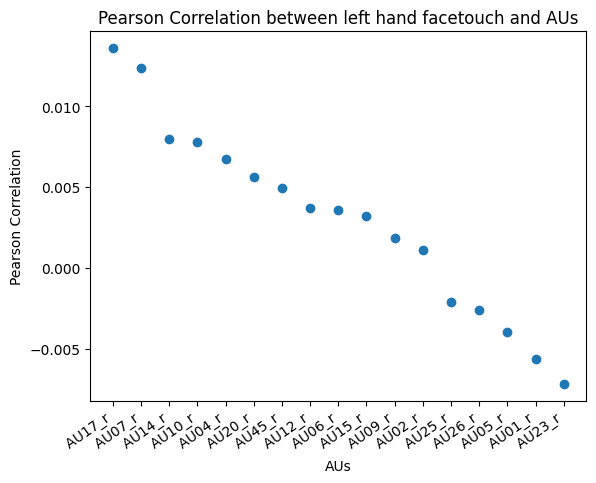

In [44]:

left_s = dict(sorted(left_mean.items(), key=lambda item: item[1], reverse=True))


# Convert the dictionary to two NumPy arrays
x = np.array(list(left_s.keys()))
y = np.array(list(left_s.values()))

# Create a Matplotlib figure and subplot
fig, ax = plt.subplots()

# Plot the data on the subplot
ax.scatter(x, y)

# Customize the plot as desired
ax.set_xlabel('AUs')
ax.set_ylabel('Pearson Correlation')
ax.set_title('Pearson Correlation between left hand facetouch and AUs')
ax.set_xticklabels(x, rotation=35, ha='right')
# Show the plot
plt.savefig('correlationLH.png')
plt.show()

/tmp/ipykernel_11342/623469501.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=35, ha='right')


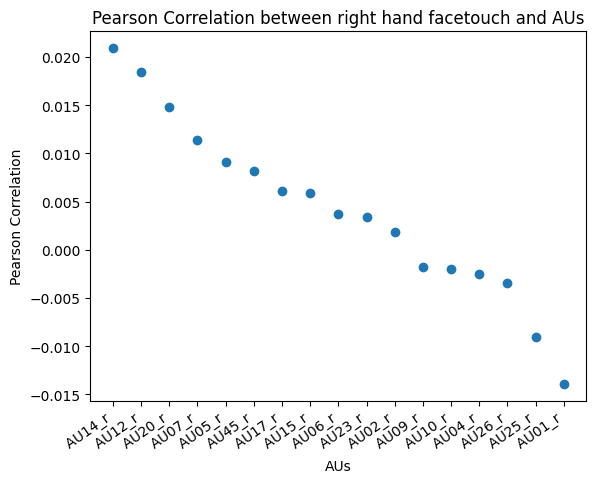

In [45]:
right_s = dict(sorted(right_mean.items(), key=lambda item: item[1], reverse=True))


# Convert the dictionary to two NumPy arrays
x = np.array(list(right_s.keys()))
y = np.array(list(right_s.values()))

# Create a Matplotlib figure and subplot
fig, ax = plt.subplots()

# Plot the data on the subplot
ax.scatter(x, y)

# Customize the plot as desired
ax.set_xlabel('AUs')
ax.set_ylabel('Pearson Correlation')
ax.set_title('Pearson Correlation between right hand facetouch and AUs')
ax.set_xticklabels(x, rotation=35, ha='right')
# Show the plot
plt.savefig('correlationRH.png')
plt.show()

In [46]:
#save the updated dataframes
with open("facetouch_dataframes.pickle", 'wb') as f:
    pickle.dump(ft_dataframes, f)